In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bird-speciees-dataset/Bird Speciees Dataset/CARMINE BEE-EATER/029.jpg
/kaggle/input/bird-speciees-dataset/Bird Speciees Dataset/CARMINE BEE-EATER/014.jpg
/kaggle/input/bird-speciees-dataset/Bird Speciees Dataset/CARMINE BEE-EATER/109.jpg
/kaggle/input/bird-speciees-dataset/Bird Speciees Dataset/CARMINE BEE-EATER/034.jpg
/kaggle/input/bird-speciees-dataset/Bird Speciees Dataset/CARMINE BEE-EATER/024.jpg
/kaggle/input/bird-speciees-dataset/Bird Speciees Dataset/CARMINE BEE-EATER/033.jpg
/kaggle/input/bird-speciees-dataset/Bird Speciees Dataset/CARMINE BEE-EATER/094.jpg
/kaggle/input/bird-speciees-dataset/Bird Speciees Dataset/CARMINE BEE-EATER/049.jpg
/kaggle/input/bird-speciees-dataset/Bird Speciees Dataset/CARMINE BEE-EATER/048.jpg
/kaggle/input/bird-speciees-dataset/Bird Speciees Dataset/CARMINE BEE-EATER/115.jpg
/kaggle/input/bird-speciees-dataset/Bird Speciees Dataset/CARMINE BEE-EATER/131.jpg
/kaggle/input/bird-speciees-dataset/Bird Speciees Dataset/CARMINE BEE-EATER/

In [2]:
import os
import cv2
import random
import shutil
import matplotlib.pyplot as plt


In [3]:
dataset_dir = '/kaggle/input/bird-speciees-dataset/Bird Speciees Dataset'
train_dir = '/kaggle/working/Train'
test_dir = '/kaggle/working/Test'

In [4]:
split_ratio = 0.85

# Iterate through each bird species folder
for bird_species in os.listdir(dataset_dir):
    species_folder = os.path.join(dataset_dir, bird_species)

    # Check if the current path is a directory
    if os.path.isdir(species_folder):
        # List all images in the species folder
        images = os.listdir(species_folder)
        # Shuffle the images to ensure randomness
        random.shuffle(images)

        # Split the Data
        split_point = int(len(images) * split_ratio)
        train_images = images[:split_point]
        test_images = images[split_point:]

        # Create species folder in train and test directories
        train_species_folder = os.path.join(train_dir, bird_species)
        test_species_folder = os.path.join(test_dir, bird_species)

        os.makedirs(train_species_folder, exist_ok=True)
        os.makedirs(test_species_folder, exist_ok=True)

        # Copy images to the training set
        for image in train_images:
            src = os.path.join(species_folder, image)
            dst = os.path.join(train_species_folder, image)
            shutil.copyfile(src, dst)

        # Copy images to the testing set
        for image in test_images:
            src = os.path.join(species_folder, image)
            dst = os.path.join(test_species_folder, image)
            shutil.copyfile(src, dst)

# Confirmation message
print("Data has been split between test and train successfully")


Data has been split between test and train successfully


In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

image_shape = (150,150,3)
image_generation = ImageDataGenerator(
    rotation_range = 30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    rescale= 1/255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [11]:
from keras.models import Sequential
from keras.layers import Activation, Dropout,Flatten,Dense,Conv2D,MaxPooling2D, Input
model = Sequential()

model.add(Input(shape=image_shape))
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dropout(0.5))
model.add(Dense(6))

model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [12]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 148, 148, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 74, 74, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 72, 72, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 34, 34, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 17, 17, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 18496)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │     2,367,616 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 6)              │           774 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 6)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,444,038 (9.32 MB)

 Trainable params: 2,444,038 (9.32 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
batch_size=20

train_image_gen = image_generation.flow_from_directory(train_dir,target_size=image_shape[:2],batch_size=batch_size,class_mode='categorical')
test_image_gen = image_generation.flow_from_directory(test_dir,target_size=image_shape[:2],batch_size=batch_size,class_mode='categorical')

Found 687 images belonging to 6 classes.
Found 124 images belonging to 6 classes.


In [16]:
train_image_gen.class_indices


{'AMERICAN GOLDFINCH': 0,
 'BARN OWL': 1,
 'CARMINE BEE-EATER': 2,
 'DOWNY WOODPECKER': 3,
 'EMPEROR PENGUIN': 4,
 'FLAMINGO': 5}

In [17]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [18]:
result = model.fit(train_image_gen,
                              epochs=100,
                              steps_per_epoch=49, 
                              validation_data=test_image_gen,
                              validation_steps=18) 

Epoch 1/100


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1729756367.669815     102 service.cc:145] XLA service 0x787944003ea0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1729756367.669890     102 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1729756367.669895     102 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


 3/49 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - accuracy: 0.1528 - loss: 1.8994

I0000 00:00:1729756372.523605     102 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


34/49 ━━━━━━━━━━━━━━━━━━━━ 2s 179ms/step - accuracy: 0.2556 - loss: 1.7387

/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


49/49 ━━━━━━━━━━━━━━━━━━━━ 15s 162ms/step - accuracy: 0.2892 - loss: 1.6800 - val_accuracy: 0.6452 - val_loss: 1.0724
Epoch 2/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 78ms/step - accuracy: 0.6285 - loss: 0.9481 - val_accuracy: 0.7016 - val_loss: 0.6595
Epoch 3/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 77ms/step - accuracy: 0.7669 - loss: 0.6719 - val_accuracy: 0.7097 - val_loss: 0.7961
Epoch 4/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 78ms/step - accuracy: 0.7392 - loss: 0.7132 - val_accuracy: 0.7339 - val_loss: 0.7064
Epoch 5/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 80ms/step - accuracy: 0.7746 - loss: 0.6131 - val_accuracy: 0.8790 - val_loss: 0.3744
Epoch 6/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 78ms/step - accuracy: 0.8026 - loss: 0.5132 - val_accuracy: 0.8306 - val_loss: 0.4584
Epoch 7/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 79ms/step - accuracy: 0.8697 - loss: 0.4453 - val_accuracy: 0.8468 - val_loss: 0.3976
Epoch 8/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 78ms/step - accuracy: 0.8477 - loss: 0.4766 - val_accuracy: 0.8790 - val

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


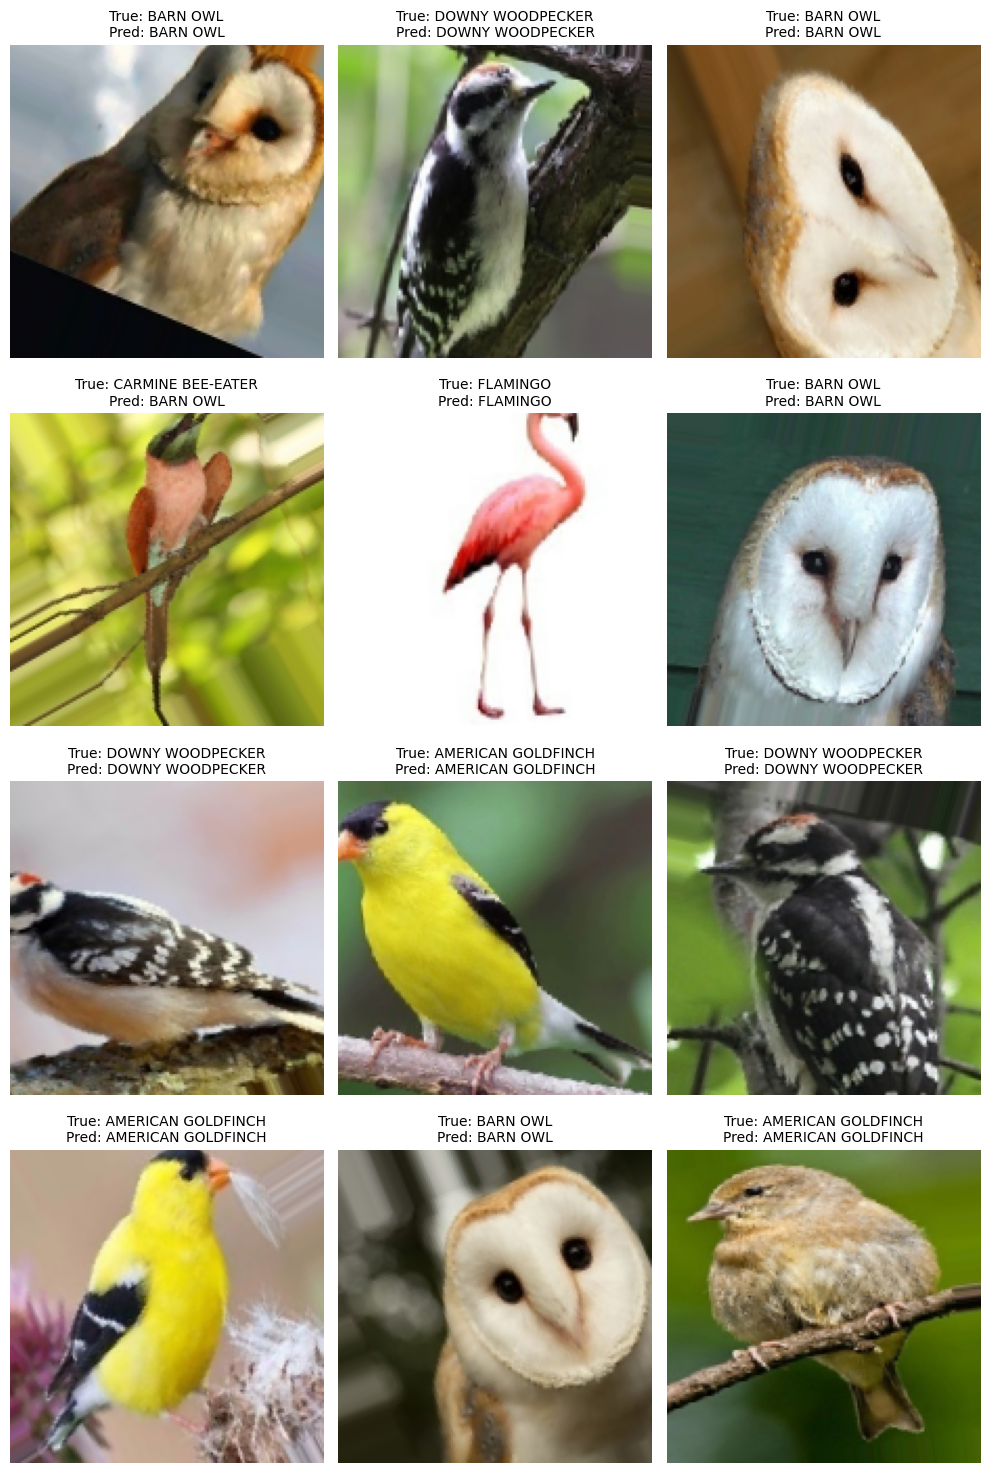

In [19]:
X_test_batch, y_test_batch = next(test_image_gen)
predictions = model.predict(X_test_batch)
predicted_classes = np.argmax(predictions, axis=1)
class_labels = list(test_image_gen.class_indices.keys())

plt.figure(figsize=(10, 15))
for i in range(12):
    plt.subplot(4, 3, i + 1)
    plt.imshow(X_test_batch[i])
    plt.axis('off')
    true_label = class_labels[y_test_batch[i].argmax()]
    predicted_label = class_labels[predicted_classes[i]]
    plt.title(f"True: {true_label}\nPred: {predicted_label}", fontsize=10)

plt.tight_layout()
plt.show()